In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,5))

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

In [97]:
df=pd.read_csv("Telecom_Churn_Data.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [161]:
df.shape

(7043, 20)

# Data preprocessing

In [98]:
df.drop('customerID',axis='columns',inplace=True)

In [99]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [100]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape


(11, 20)

In [101]:
df1=df[df.TotalCharges!=' ']


In [162]:
df.shape

(7043, 20)

In [163]:
df1.shape

(7032, 20)

In [104]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [105]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\Mandar Warghade\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [106]:
df1.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# checking null values

In [141]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# checking outliers

In [107]:
plt.subplot(1,3,1)
sns.distplot(df['tenure'])


plt.subplot(1,3,2)
sns.distplot(df['MonthlyCharges'])

plt.subplot(1,3,3)
sns.distplot(df1['TotalCharges'])

plt.show()

C:\Users\Mandar Warghade\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mandar Warghade\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mandar Warghade\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

C:\Users\Mandar Warghade\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mandar Warghade\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mandar Warghade\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


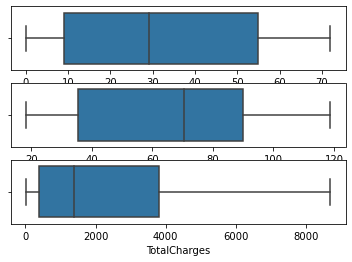

In [108]:
plt.subplot(3,1,1)
sns.boxplot(df['tenure'])


plt.subplot(3,1,2)
sns.boxplot(df['MonthlyCharges'])

plt.subplot(3,1,3)
sns.boxplot(df1['TotalCharges'])

plt.show()

# converting text to numbers

In [109]:
text_data = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','Contract','PaymentMethod',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn','gender','InternetService']

In [110]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in text_data:
  df1[i]=le.fit_transform(df1[i])

C:\Users\MANDAR~1\AppData\Local\Temp/ipykernel_20304/2041316722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=le.fit_transform(df1[i])


In [111]:
df1.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

# scaling the value

In [164]:
from sklearn.preprocessing import StandardScaler
encode=['MonthlyCharges','TotalCharges','tenure']
scaler=StandardScaler()
for i in encode:
  df1[i]=scaler.fit_transform(df1[i].values.reshape(-1,1))


C:\Users\MANDAR~1\AppData\Local\Temp/ipykernel_20304/3713233324.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=scaler.fit_transform(df1[i].values.reshape(-1,1))
C:\Users\MANDAR~1\AppData\Local\Temp/ipykernel_20304/3713233324.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=scaler.fit_transform(df1[i].values.reshape(-1,1))
C:\Users\MANDAR~1\AppData\Local\Temp/ipykernel_20304/3713233324.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [113]:
df1.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.280248             0   
1       1              0        0           0  0.064303             1   
2       1              0        0           0 -1.239504             1   
3       1              0        0           0  0.512486             0   
4       0              0        0           0 -1.239504             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2       -1.161694     -0.994194      0  
1                 0              3       -0.260878     -0.173740      0  
2                 1              3       -0.363923     -0.959649      1  
3                 0              0       -0.747850     -0.195248      0  
4                 1              2        0.196178     -0.940457      1

In [114]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [116]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [117]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]


In [118]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1179  132]
 [ 209  238]]


0.8060295790671217

In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1311
           1       0.64      0.53      0.58       447

    accuracy                           0.81      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.80      0.81      0.80      1758



# imbalanced data

In [120]:
df1.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [130]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)

In [131]:
pd.Series(y_sm).value_counts()

0    5163
1    5163
dtype: int64

# cross validation

In [139]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

sk=StratifiedKFold(n_splits=5)
score=cross_val_score(LogisticRegression(),X_sm, y_sm,cv=sk)
print(np.mean(score))

0.773000288306702


In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1277
           1       0.77      0.83      0.80      1305

    accuracy                           0.78      2582
   macro avg       0.79      0.78      0.78      2582
weighted avg       0.79      0.78      0.78      2582

